<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/LAB1_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 1 - INTELIGENCIA DE NEGOCIOS**

Santiago Pardo - 202013025



Luis Plazas - 202013155




Felipe Rueda - 202010903

## DESCRIPCIÓN DEL PROBLEMA

### Contexto



En el vasto panorama del mundo empresarial, la comprensión profunda de los clientes es la clave para el éxito sostenible. La segmentación de clientes emerge como una poderosa herramienta estratégica que redefine la forma en que las empresas abordan sus mercados. Este proceso implica la división cuidadosa y deliberada de la base de clientes en grupos homogéneos, con características y comportamientos similares. La segmentación de clientes va más allá de la simple categorización; es la llave maestra que desbloquea el potencial de la personalización. Al centrarse en las similitudes y preferencias compartidas dentro de cada segmento, las empresas pueden anticipar las necesidades de sus clientes, crear mensajes más efectivos y diseñar productos y servicios que resuenen con precisión.



AlpesInsight, es una empresa pionera en la intersección de servicios financieros y tecnología. En su búsqueda constante para ofrecer experiencias personalizadas y seguras a sus clientes, AlpesInsight está expandiendo su equipo con la incorporación de expertos en aprendizaje automático para enfrentar el desafío de aprovechar datos de transacciones con tarjetas de crédito para comprender los patrones de comportamiento y preferencias de los clientes. AlpesInsight se esfuerza por desarrollar soluciones innovadoras que permitan personalizar ofertas financieras y servicios, mejorando así la satisfacción del cliente y fortaleciendo la seguridad de las transacciones. El equipo ha dedicido utilizar técnicas de agrupación para resolver este reto



### Diccionario de los Datos (En Inglés)



| Atributo                         | Significado                                                                                                                   |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| CUST_ID                          | Credit card holder ID                                                                                                         |
| BALANCE                          | Monthly average balance (based on daily balance averages)                                                                     |
| BALANCE_FREQUENCY                | Ratio of last 12 months with balance. (1: Frequently updated, 0: Not frequently updated)                                      |
| PURCHASES                        | Total purchase amount spent during last 12 months                                                                             |
| ONEOFF_PURCHASES                 | Total amount of one-off purchases                                                                                             |
| INSTALLMENTS_PURCHASES           | Total amount of installment purchases                                                                                         |
| CASH_ADVANCE                     | Total cash-advance amount                                                                                                     |
| PURCHASES_FREQUENCY              | Frequency of purchases (Percent of months with at least one purchase). (1: Frequently purchased, 0: Not frequently purchased) |
| ONEOFF_PURCHASES_FREQUENCY       | Frequency of one-off-purchases. (1: Frequently purchased, 0: Not frequently purchased)                                        |
| PURCHASES_INSTALLMENTS_FREQUENCY | Frequency of installment purchases. (1: Frequently purchased, 0: Not frequently purchased)                                    |
| CASHADVANCE_FREQUENCY            | Cash-Advance frequency                                                                                                        |
| CASH_ADVANCE_TRX                 | Average amount per cash-advance transaction                                                                                   |
| PURCHASES_TRX                    | Average amount per purchase transaction                                                                                       |
| CREDIT_LIMIT                     | Credit limit                                                                                                                  |
| PAYMENTS                         | Total payments (Due amount paid by the customer to decrease their statement balance) in the period                            |
| MINIMUM_PAYMENTS                 | Total minimum payments due in the period                                                                                      |
| PRC_FULL_PAYMEN                  | Percentage of months with full payment of the due statement balance                                                           |
| TENURE                           | Number of months as a customer                                                                                                |

## ENTENDIMIENTO DE LOS DATOS


### *Tablero de Control*


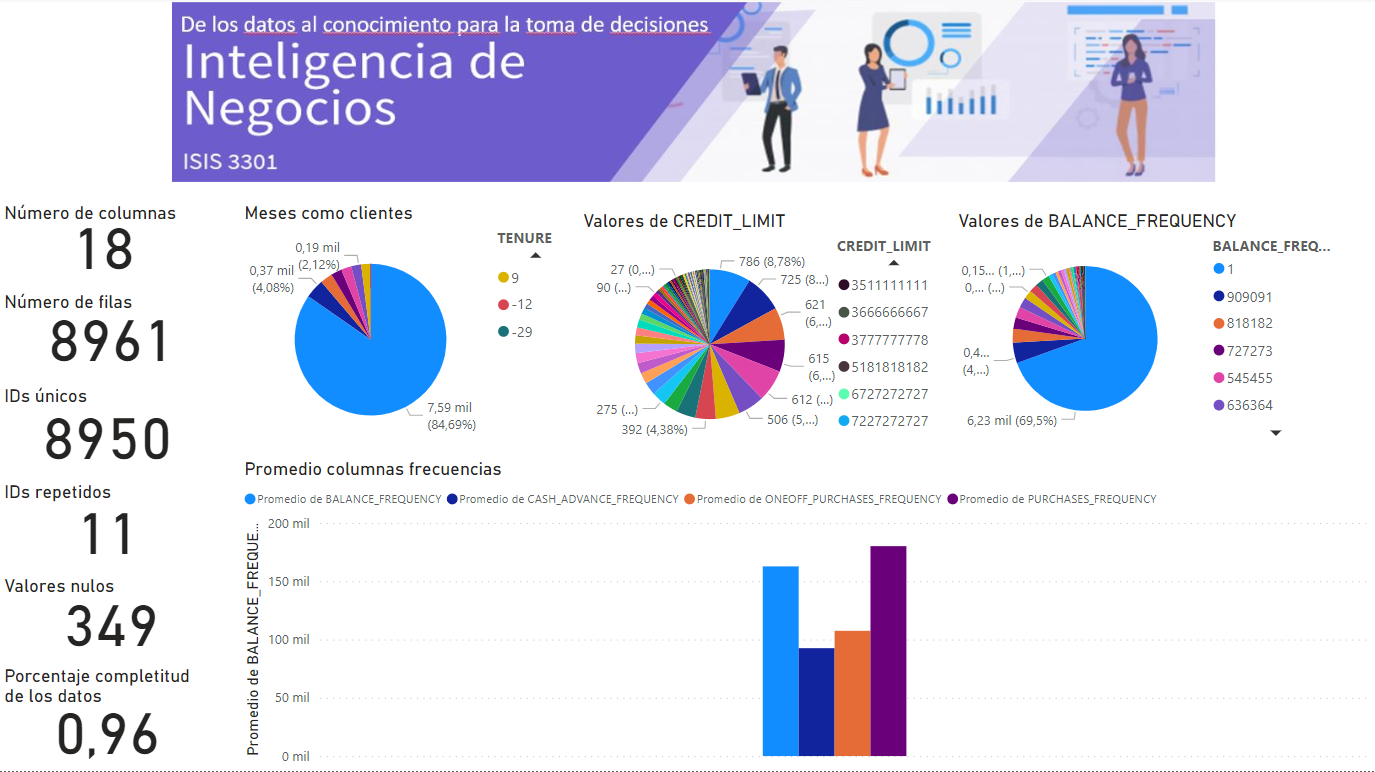

Hay datos inconsistentes en las columnas de TENURE, CREDIT_LIMIT y en las columnas de FREQUENCY. Por ejemplo en tenure se están mostrando la cantidad de meses que han sido clientes, por lo que no puede haber valores negativos. Por otro lado, hay valores de los límites de crédito que no se ajustan a la normalidad, ya que son bastante extremos. En las columnas de frecuencia deben haber valores que se encuentren entre 0 y 1, pero como se puede observar hay valores que se salen de este rango.

In [ ]:
import pandas as pd

In [ ]:
#Lectura
#Luis
#df = pd.read_csv('/202410_Laboratorio 1 - Agrupación_Customer_Data.csv',sep=',')
#Santiago
df = pd.read_csv('/content/sample_data/202410_Laboratorio 1 - Agrupación_Customer_Data.csv',sep=',')

A continuación se muestran los diferentes tipos de datos que hay en la tabla, los valores no nulos que tienen y a que columnas corresponden.

In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

También se pueden saber diferentes valores de las tablas, como sus valores máximos, minimos, su mediana y el conteo de los datos que hay en tales columnas

In [ ]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# PERFILAMIENTO DE DATOS

En primer lugar, se hizo una visualización preliminar de los datos y cómo se visualizan en principio, y si a ojo propio, se puede ver alguna otra inconsistencia además de las mencionadas en la etapa de entendimiento de los datos.

In [ ]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,NaN,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8956,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8957,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8958,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8959,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### *Eliminación de datos nulos*

Lo primero que se realizará en esta limpieza de datos es eliminar todos los datos nulos, ya que según el análisis realizado en el entendimiento de los datos, se encontraron 349 valores nulos, en comparación a los 8961 datos totales, la eliminación de dichos datos no generaría cambios significativos dentro de los modelos, teniendo en cuenta otros indicadores como el índice de completitud y nuevamente, la cantidad de valores nulos encontrados.

In [ ]:
#Total de Datos sin Limpieza
df.shape[0]

8961

In [ ]:
#Eliminación de datos nulos
df_clean_na = df.dropna()

In [ ]:
#Total de Datos con Eliminación de Datos Nulos
df_clean_na.shape[0]

8619

In [ ]:
#Datos Nulos Encontrados
df.shape[0] - df_clean_na.shape[0]

342

Por lo que de esta eliminación, se puede ver que se eliminaron 342 datos, lo cual es cercano al número de valores nulos encontrados en el entendimiento de los datos encontrado (349)

### *Atributos de Frecuencia*

De acuerdo al diccionario de los datos, varios de los valores de ciertos atributos deben estar dentro de un rango asociado entre 0 y 1, estos atributos son:

BALANCE_FREQUENCY



PURCHASES_FREQUENCY



ONE_OFF_PURCHASES_FREQUENCY



PURCHASES_INSTALLMENS_FREQUENCY



CASH_ADVANCE_FREQUENCY



De acuerdo con el entendimiento, existen valores que no cumplen dichas condiciones en los atributos ONE_OFF_PURCHASES_FREQUENCY y CASH_ADVANCE_FREQUENCY, por lo cual, en esta etapa se eliminarán dichos datos inconsistentes de estos atributos

In [ ]:
#Eliminación de Datos
#Columna ONEOFF_PURCHASES_FREQUENCY
df_oopf = df_clean_na[(df_clean_na['ONEOFF_PURCHASES_FREQUENCY'] >= 0) & (df_clean_na['ONEOFF_PURCHASES_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_oopf.shape[0]

12

Se eliminaron 12 datos en los cuales no se cumplía el rango de frecuencia para el atributo ONE_OFF_PURCHASES_FREQUENCY

In [ ]:
#Eliminación de Datos
#Columna CASH_ADVANCE_FREQUENCY
df_caf = df_clean_na[(df_clean_na['CASH_ADVANCE_FREQUENCY'] >= 0) & (df_clean_na['CASH_ADVANCE_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_caf.shape[0]

8

Se eliminaron 8 datos en los cuales no se cumplía el rango de frecuencia para el atributo CASH_ADVANCE_FREQUENCY

In [ ]:
#Almacenar variables para futuras limpiezas
df_frequencies = df_oopf[(df_oopf['CASH_ADVANCE_FREQUENCY'] >= 0) & (df_oopf['CASH_ADVANCE_FREQUENCY'] <= 1)]
df_clean_na.shape[0] - df_frequencies.shape[0]

20

En total, se eliminaron 20 datos que tenían inconsistencia del rango de frecuencia

### *Atributos de Cantidad de Meses*

Concretamente, para el atributo TENURE, se encontró que representaba la cantidad de meses (0-12), según el entendimiento de los datos, se encontraron valores menores a 0, por lo cual, en esta etapa se realizó la eliminación de dichos datos

In [ ]:
#Eliminar datos con meses negativos
df_tenure = df_frequencies[(df_frequencies['TENURE'] >= 0) & (df_frequencies['TENURE'] <= 12)]
df_frequencies.shape[0] - df_tenure.shape[0]

4

En total, se eliminaron 4 datos que tenían inconsistencia con la cantidad de meses

## MODELAMIENTO

## VALIDACIÓN